<a href="https://colab.research.google.com/github/teethavattcp/teethavat_port_data/blob/main/03_MarketBasketAnalysis_80_20_rule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Market Basket Analysis

# Import dataset

https://drive.google.com/file/d/1YdnAe0EJsSHOi6rSIJ5p0ef_sySo0MKb/view?usp=drive_link

In [1]:
import os

In [2]:
import time

# Import libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [4]:
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=d151ed9433d1c4f820b79b2e5ae70c68ef22ea3fa68015be12080a9ec0184793
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [5]:
import pandasql

In [6]:
import plotly.express as px

In [7]:
import plotly.graph_objs as go
import plotly.io as pio

In [8]:
import datetime as dt
from datetime import datetime

In [9]:
from pathlib import Path

In [10]:
import networkx as nx

In [11]:
pip install igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 13.0 MB/s eta 0:00:00


In [12]:
import igraph as ig

#Define fn for cleaning raw data

##count_total_duplicates(df)

In [13]:
def count_total_duplicates(df):
    # Identifying duplicate rows (excluding the first occurrence)
    duplicates = df.duplicated(keep='first')

    # Summing the number of duplicate rows
    total_duplicates = duplicates.sum()

    return total_duplicates

In [14]:
# Example usage
data = {
    'A': ['foo', 'bar', 'foo', 'baz', 'foo'],
    'B': ['one', 'one', 'two', 'two', 'one'],
    'C': [1, 2, 3, 4, 1],
    'D': [5, 6, 7, 8, 5]
}
df_test = pd.DataFrame(data)
df_test

,A,B,C,D
0,foo,one,1,5
1,bar,one,2,6
2,foo,two,3,7
3,baz,two,4,8
4,foo,one,1,5


In [15]:
total_duplicates = count_total_duplicates(df_test)
print(f'Total number of duplicate rows: {total_duplicates}')

Total number of duplicate rows: 1


##check_duplication_in_df(df)

In [16]:
def check_duplication_in_df(df):
  total_duplicates = count_total_duplicates(df)
  if total_duplicates > 0:
    print(f"There are {total_duplicates} duplicate rows in the DataFrame.")
    df.drop_duplicates(inplace=True)
    print("Duplicate rows were dropped.")
    print("New shape of dataframe after dropping duplicate rows:",df.shape)
  elif total_duplicates == 0:
    print("No duplicate rows found.")

## format_number(x)

In [17]:
def format_number(x):
    if isinstance(x, float):
        if x.is_integer():
            return '{:.0f}'.format(x)  # Convert to integer if it's a whole number
        else:
            return '{:.2f}'.format(x)  # Keep as float with 2 decimal places
    return x

## explore_df(df_for_eda)

In [18]:
def explore_df(df_for_eda):
  print("#Check shape")
  print(df_for_eda.shape,"\n")

  print("#Check duplication")
  check_duplication_in_df(df_for_eda)

  print("\n#Check missing value")
  if df_for_eda.isnull().sum().sum() == 0:
    print("No missing values found.")
  else:
    print("Missing values found:", df_for_eda.isnull().sum().sum())
    print("\nNumber of missing values:\n",df_for_eda.isnull().sum())
    print("\nPercentage of missing values:\n",df_for_eda.isnull().sum()/len(df_for_eda)*100)

  print("\n#Check data type")
  print(df_for_eda.info(),"\n")

  print("\n#Check unique value")
  print(df_for_eda.nunique(),"\n")

  print("#List of column name:\n",df_for_eda.columns.tolist())

## explore_classes_in_df(df,df_col_cat)

In [19]:
def explore_classes_in_df(df,df_col_cat):
  for col in df_col_cat:
    print ("\n-------- %s --------" % col)
    print (df[col].value_counts())

In [20]:
def explore_distribution_in_df(df,df_col_num):
  for col in df_col_num:
    #histogram plot
    #plt.figure(figsize=(2.5, 1.25))
    print ("\n-------- %s --------" % col)

    # Create the histogram plot to calculate the max count
    hist = sns.histplot(df[col])

    # Calculate the maximum count (frequency)
    max_count = hist.patches[0].get_height()  # Initialize with the first bar's height
    for bar in hist.patches:
        if bar.get_height() > max_count:
            max_count = bar.get_height()

    # Clear the current plot to redraw with y-axis limit
    plt.clf()

    # Create the histogram plot again
    sns.histplot(df[col])

    # Set the maximum limit for the y-axis
    plt.ylim(top=1.3 * max_count)

    # Display the plot
    plt.title(f'Histogram of {col}')
    plt.show()

    #box plot
    #plt.figure(figsize=(2.5, 1.25))
    plt.clf()
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

## deepexploredf(df,df_col_cat, df_col_num)

In [21]:
import matplotlib.cm as cm

In [22]:
def deepexploredf(df,df_col_cat, df_col_num):
  print("##Explore categorical data")
  if len(df_col_cat) == 0:
    print("No categorical column found.")
  else:
    explore_classes_in_df(df,df_col_cat)

  print("\n##Explore numerical data")
  if len(df_col_num) == 0:
    print("No numerical data found.")
  else:
    print("#Check statistical summary")
    print(df[df_col_num].describe().applymap(format_number).transpose().to_markdown())
    print("#Check correlation")
    #plt.figure(figsize = (2,1.25))
    #plt.rcParams.update({'font.size': 10})
    sns.heatmap(df[df_col_num].corr(), annot =True, cmap=cm.coolwarm_r, vmin=-1, vmax=1)
    plt.show()
    #sns.pairplot(df[df_col_num])
    #plt.show()

## export_to_csv(path_of_folder,file_name,df)

In [23]:
def export_to_csv(path_of_folder,file_name,df):
  filepath = Path(str(path_of_folder)+str(file_name)+'.csv')
  filepath.parent.mkdir(parents=True, exist_ok=True)
  df.to_csv(filepath,mode = 'w', index=False)
  print(str(file_name)+'.csv has been exported successfully.')

In [24]:
path_folder='/content/drive/MyDrive/DATA_SCI_SKILL/202406_CompleteJourneyProj/data set'+'/'

## explore_ranges_of_num_field(df,df_col_num)

In [25]:
def explore_ranges_of_num_field(df,list_col_num):
  for col in df[list_col_num]:
    count_less_than_0_butsmallamount = len(df[(df[col] < 0) & (df[col] > -0.01)]) #-0.01 < value < 0
    count_less_than_0_butlargeamount = len(df[df[col] <= -0.01]) #-0.01 =< value
    count_equal_to_0 = len(df[df[col] == 0])
    count_greater_than_0_but_smallamount = len(df[(df[col] > 0)& (df[col] < 0.01)])
    count_greater_than_0_but_largeamount = len(df[(df[col] >= 0.01)])
    print(col,':')
    print(f'Count of values << 0: {count_less_than_0_butlargeamount}')
    print(f'Count of -0.01 < values < 0: {count_less_than_0_butsmallamount}')
    print(f'Count of values = 0: {count_equal_to_0}')
    print(f'Count of 0 < values < 0.01: {count_greater_than_0_but_smallamount}')
    print(f'Count of values >> 0: {count_greater_than_0_but_largeamount}')
    print('\n')

## add_status_column(df, left_col, right_col, status_col='status')

Add a status column to the DataFrame based on the comparison of two columns from left and right DataFrames.
```
 Parameters:
    - df (pd.DataFrame): The DataFrame resulting from an outer join.
    - left_col (str): The column name from the left DataFrame.
    - right_col (str): The column name from the right DataFrame.
    - status_col (str): The name of the new status column. Default is 'status'.

 Returns:
    - pd.DataFrame: The DataFrame with the added status column.

```


In [26]:
def add_status_column(df, left_col, right_col, status_col='status'):
    conditions = [
        (df[left_col].notna()) & (df[right_col].notna()),  # Found value in both tables
        (df[left_col].notna()) & (df[right_col].isna()),   # Found value only in the left table
        (df[left_col].isna()) & (df[right_col].notna())    # Found value only in the right table
    ]

    choices = ['Found in both', 'Found only in left', 'Found only in right']

    df[status_col] = pd.Series(np.select(conditions, choices, default=None))
    return df

## dict_k2v_v2k(input_dict):

In [27]:
def dict_k2v_v2k(input_dict):
  output_dict = {}

  for data_type, columns in input_dict.items():
    for column in columns:
        output_dict[column] = data_type

  return output_dict

## replace_valueindf(df,col_key_name,col_val_name,dict_kv_replace)

In [28]:
def replace_valueindf(df,col_key_name,col_val_name,dict_kv_replace):
  if df[col_key_name] in dict_kv_replace.keys():
    df[col_val_name] = dict_kv_replace[df[col_key_name]]
  return df

# Prepare data for analysis

From data exploration, there are about 275,889 unique baskets/transactions [after data cleaning] for over two year (which is too much and limitation of RAM is also considerable). In this section, we want to focus on studying the pattern how each household spend the product which have potential for increasing revenue (SALESVALUE) of retails.

Thus, applying the 80/20 rule (Pareto Principle) to focus on the top 20% of spending baskets in your market basket analysis can be an effective strategy, providing more impactful insights and can drive significant business decisions.

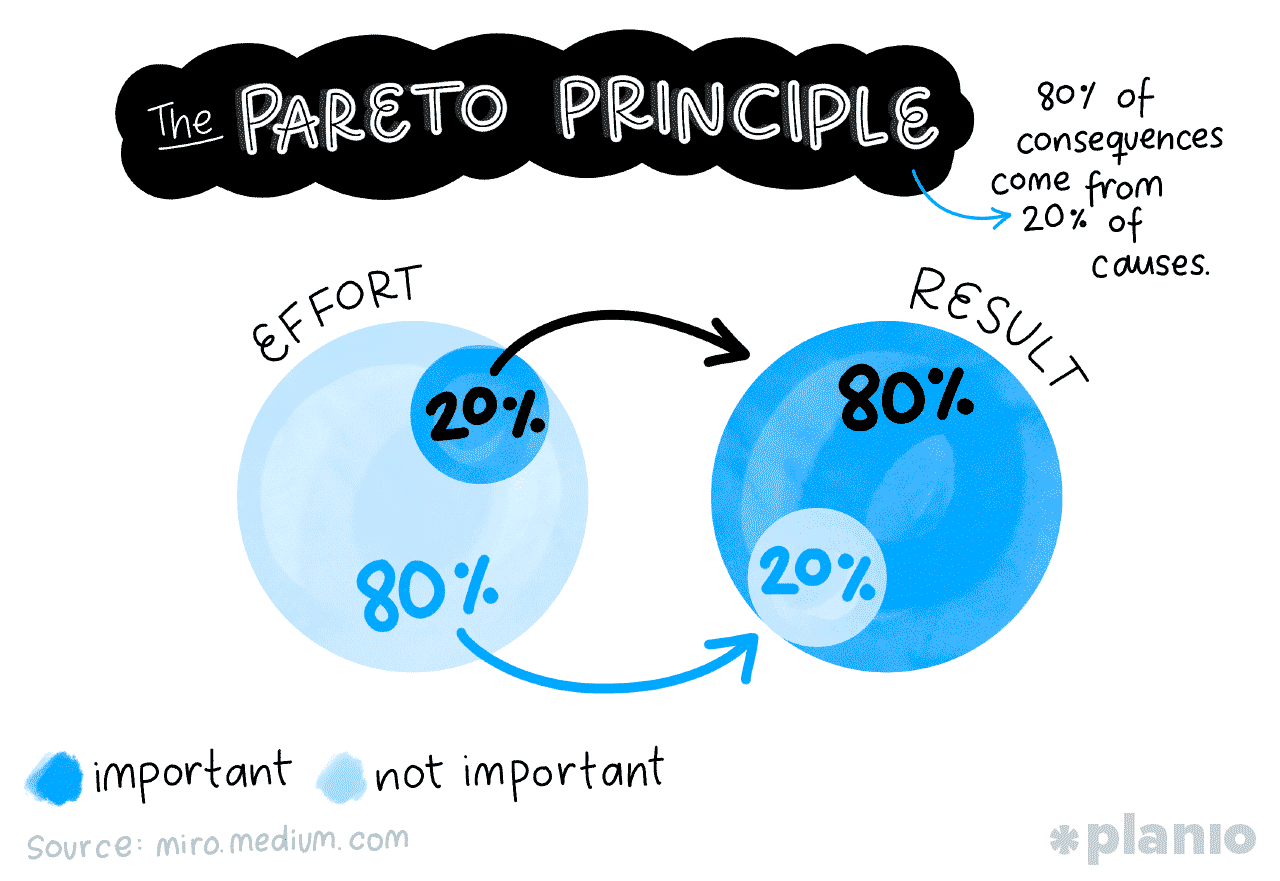

##Import data

In [29]:
df_product = pd.read_csv('/content/drive/MyDrive/DATA_SCI_SKILL/202406_CompleteJourneyProj/data set/dim_product_master.csv', delimiter=",")

In [30]:
df = pd.read_csv('/content/drive/MyDrive/DATA_SCI_SKILL/202406_CompleteJourneyProj/data set/fact_trans_x_couponredempt.csv')
df = df.rename(columns={'PRODUCT_ID_x': 'PRODUCT_ID'})
df

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,TOTAL_DISC,If_used_retail_loyalprog,If_used_manu_coupon,If_used_giveaway_promo,Actual_card_price,Cust_paid_price,COUPON_UPC
0,1,27601281299,51,825123,1,3.99,436,0.00,1456,8,0.0,0.0,0.00,0,0,0,3.99,3.99,NaN
1,1,27601281299,51,831447,1,2.99,436,0.00,1456,8,0.0,0.0,0.00,0,0,0,2.99,2.99,NaN
2,1,27601281299,51,840361,1,1.09,436,-0.30,1456,8,0.0,0.0,-0.30,1,0,0,1.39,1.09,NaN
3,1,27601281299,51,845307,1,3.71,436,-0.62,1456,8,0.0,0.0,-0.62,1,0,0,4.33,3.71,NaN
4,1,27601281299,51,852014,1,2.79,436,-1.20,1456,8,0.0,0.0,-1.20,1,0,0,3.99,2.79,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581261,2500,42250641157,708,1109947,1,3.19,447,-0.80,1620,102,0.0,0.0,-0.80,1,0,0,3.99,3.19,NaN
2581262,2500,42250641157,708,1117514,1,1.99,447,0.00,1620,102,0.0,0.0,0.00,0,0,0,1.99,1.99,NaN
2581263,2500,42250641157,708,8019186,1,2.59,447,-1.00,1620,102,0.0,0.0,-1.00,1,0,0,3.59,2.59,NaN
2581264,2500,42250641157,708,15596705,1,2.77,447,-3.02,1620,102,-1.0,0.0,-3.02,1,0,0,5.79,3.77,NaN


## Aggregate Transaction Data

In [31]:
basket_summary = df.groupby(['BASKET_ID']).agg({
    'PRODUCT_ID': lambda x: ','.join(x.astype(str)),  # Combine products in basket
    'QUANTITY': 'sum',  # Total quantity of products in the basket
    'SALES_VALUE': 'sum'  # Total sales value for the basket
}).reset_index()
basket_summary

,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE
0,26984851472,"1004906,1033142,1036325,1082185,8160430",5,5.91
1,26984851516,"826249,1043142,1085983,1102651,6423775,9487839",7,12.43
2,26984896261,"842930,897044,920955,937406,981760",5,11.37
3,26984905972,"833715,866950,1022843,1048462,1071333",9,2.55
4,26984945254,"824399,923972,1131351",4,3.53
...,...,...,...,...
275884,42302712006,"882441,1117219,1135573,14025651",4,9.78
275885,42302712189,"844054,844759,959737,1135096,9526344",6,33.64
275886,42302712298,"824005,826144,856345,904148,976199,1052686,111...",11,40.70
275887,42305362497,"49659,106589,114397,17295222,17904923",6,5.61


In [32]:
basket_summary['SALES_VALUE'].sum()

8057443.8

In [33]:
basket_summary_ = pandasql.sqldf('''
WITH
    -- Step 1: Calculate total sales value
    TotalSales AS (
        SELECT SUM(SALES_VALUE) AS total_sales_value
        FROM basket_summary
    ),

    -- Step 2: Calculate cumulative sales value and cumulative percentage
    CumulativeSales AS (
        SELECT
            BASKET_ID,
            PRODUCT_ID,
            QUANTITY,
            SALES_VALUE,
            SUM(SALES_VALUE) OVER (ORDER BY SALES_VALUE DESC ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS cumulative_sales_value,
            (SUM(SALES_VALUE) OVER (ORDER BY SALES_VALUE DESC ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) / total_sales_value) AS cumulative_percentage
        FROM basket_summary, TotalSales
    )

-- Final result: Select the top 20% based on cumulative percentage
SELECT *
FROM CumulativeSales
WHERE cumulative_percentage <= 0.20
ORDER BY cumulative_percentage ASC;

''')
basket_summary_

,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,cumulative_sales_value,cumulative_percentage
0,32006114302,"825731,838971,853354,862725,866211,885309,9073...",52,961.49,961.49,0.000119
1,40387571385,"827919,846761,857849,866211,882289,948670,9545...",24,681.58,1643.07,0.000204
2,33347880492,"822225,824426,829030,831919,833598,835080,8376...",217,552.92,2195.99,0.000273
3,32505140858,"846561,948225,1024907,1122657,1126438,5570590,...",63,545.17,2741.16,0.000340
4,30983766334,"821324,821890,822524,822816,822936,824555,8263...",351,545.07,3286.23,0.000408
...,...,...,...,...,...,...
9895,40865120651,"821083,824593,825541,842392,860776,901813,9033...",52,117.32,1610955.51,0.199934
9896,34133753551,"829001,846830,847049,847789,857503,868319,8930...",64,117.32,1611072.83,0.199948
9897,40955445980,"824915,827218,873964,894511,904937,911470,9132...",38,117.32,1611190.15,0.199963
9898,27774401947,"860776,865501,871680,879504,901306,911812,9212...",43,117.31,1611307.46,0.199977


In [34]:
basket_summary_['SALES_VALUE'].sum()

1611424.7700000003

## Convert to Transaction Format

In [35]:
from mlxtend.preprocessing import TransactionEncoder

In [36]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [37]:
# Convert product lists to list of lists
baskets = basket_summary_['PRODUCT_ID'].apply(lambda x: x.split(',')).tolist()
# Use TransactionEncoder to transform data
te = TransactionEncoder()
te_ary = te.fit(baskets).transform(baskets)
df_baskets = pd.DataFrame(te_ary, columns=te.columns_)
df_baskets

,1000002,1000050,1000057,1000059,1000092,1000099,1000106,1000140,1000148,1000157,...,999943,999953,999957,999964,999965,999966,999971,999973,999982,999992
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9895,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9896,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9897,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9898,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
(45738-92015)/92015*100

-50.2928870292887

Number of all product_id decreased about 50.29% after selecting only those from top 20% revenue

# Association Rule Mining

## Generate Frequent Itemsets:

Use Apriori algorithms to find frequent itemsets.

In [39]:
from mlxtend.frequent_patterns import apriori

Choosing a minimum support of 2% looking for itemsets that appear in at least 198
baskets in top 20% spending transactions.

In [40]:
frequent_itemsets = apriori(df_baskets, min_support=0.02, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.042222,(1003188)
1,0.070505,(1004906)
2,0.036869,(1006184)
3,0.023737,(1007195)
4,0.051010,(1013321)
...,...,...
256,0.022323,"(951590, 1106523)"
257,0.022929,"(981760, 1106523)"
258,0.024949,"(860776, 995785)"
259,0.024040,"(981760, 951590)"


## Generate Association Rules

In [41]:
from mlxtend.frequent_patterns import association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)[['antecedents' , 'consequents', 'support',	'confidence', 'lift']]
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
0,(1082185),(1003188),0.026364,0.057224,1.355312
1,(1003188),(1082185),0.026364,0.624402,1.355312
2,(1082185),(1004906),0.033939,0.073668,1.044862
3,(1004906),(1082185),0.033939,0.481375,1.044862
4,(1082185),(1013321),0.025758,0.055909,1.096034
...,...,...,...,...,...
133,(995785),(860776),0.024949,0.246016,2.475160
134,(981760),(951590),0.024040,0.159091,1.447610
135,(951590),(981760),0.024040,0.218750,1.447610
136,(981760),(995242),0.020909,0.138369,1.155019


In [43]:
print(rules.to_markdown())

|     | antecedents            | consequents            |   support |   confidence |    lift |
|----:|:-----------------------|:-----------------------|----------:|-------------:|--------:|
|   0 | frozenset({'1082185'}) | frozenset({'1003188'}) | 0.0263636 |    0.0572243 | 1.35531 |
|   1 | frozenset({'1003188'}) | frozenset({'1082185'}) | 0.0263636 |    0.624402  | 1.35531 |
|   2 | frozenset({'1082185'}) | frozenset({'1004906'}) | 0.0339394 |    0.0736681 | 1.04486 |
|   3 | frozenset({'1004906'}) | frozenset({'1082185'}) | 0.0339394 |    0.481375  | 1.04486 |
|   4 | frozenset({'1082185'}) | frozenset({'1013321'}) | 0.0257576 |    0.0559088 | 1.09603 |
|   5 | frozenset({'1013321'}) | frozenset({'1082185'}) | 0.0257576 |    0.50495   | 1.09603 |
|   6 | frozenset({'1013321'}) | frozenset({'938700'})  | 0.0217172 |    0.425743  | 6.74376 |
|   7 | frozenset({'938700'})  | frozenset({'1013321'}) | 0.0217172 |    0.344     | 6.74376 |
|   8 | frozenset({'1082185'}) | frozenset({'10220

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
product_list = []
for i in set(rules.antecedents.tolist()) | set(rules.consequents.tolist()):
  product_list.append(list(i)[0])
print(product_list,'\nNumber of bundle product_id:', len(product_list))

['979707', '995965', '908531', '910032', '1081177', '1003188', '834484', '866211', '833025', '909714', '1004906', '995242', '849843', '938700', '826249', '962229', '1022003', '1082185', '1070820', '1127831', '840361', '844179', '901062', '1029743', '859075', '1106523', '933835', '862349', '847982', '1126899', '1058997', '1044078', '923746', '1038217', '961554', '878996', '929668', '951590', '1055646', '1013321', '6034857', '883404', '1098066', '904360', '962568', '995785', '1024306', '5569230', '903325', '1096036', '916122', '1028816', '981760', '854852', '860776', '965766'] 
Number of bundle product_id: 56


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
rules.head(2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
0,(1082185),(1003188),0.026364,0.057224,1.355312
1,(1003188),(1082185),0.026364,0.624402,1.355312


## Selected product details appeared in association rules

In [46]:
df_product_selected = pandasql.sqldf('''SELECT *
FROM df_product
WHERE PRODUCT_ID IN ('1013321', '1024306', '908531', '995965', '844179', '883404', '904360', '1029743', '1070820', '1127831', '878996', '916122', '938700', '860776', '1126899', '834484', '1081177', '862349', '995785', '901062', '1044078', '961554', '1028816', '1058997', '5569230', '923746', '6034857', '1038217', '1096036', '1022003', '995242', '965766', '909714', '1055646', '979707', '826249', '903325', '910032', '962568', '1082185', '833025', '1004906', '1098066', '1003188', '849843', '933835', '866211', '847982', '859075', '1106523', '854852', '981760', '962229', '929668', '951590', '840361')
ORDER BY MANUFACTURER''')
df_product_selected

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PRODUCT_ID,MANUFACTURER,BRAND,MAIN_PRODUCT_CATEGORY,DEPARTMENT,DEPARTMENT_FULLNAME,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,ADI,CV_sqr,demand_pattern
0,834484,2,National,Food & Beverages,PRODUCE,Fresh fruits and vegetables,ONIONS,ONIONS OTHER,48 CT,1.047198,0.481748,Smooth
1,854852,2,National,Food & Beverages,PRODUCE,Fresh fruits and vegetables,TOMATOES,TOMATOES HOTHOUSE ON THE VINE,13 LB,1.039474,0.516452,Erratic
2,860776,2,National,Food & Beverages,PRODUCE,Fresh fruits and vegetables,VEGETABLES - ALL OTHERS,CUCUMBERS,36 CT,1.024496,0.360742,Smooth
3,866211,2,National,Food & Beverages,PRODUCE,Fresh fruits and vegetables,GRAPES,GRAPES WHITE,18 LB,1.100619,0.566716,Erratic
4,878996,2,National,Food & Beverages,PRODUCE,Fresh fruits and vegetables,GRAPES,GRAPES RED,18 LB,1.256637,0.814019,Erratic
5,901062,2,National,Food & Beverages,PRODUCE,Fresh fruits and vegetables,APPLES,APPLES GALA (BULK&BAG),NO SIZE DESCRIPTION,1.236427,0.453505,Smooth
6,903325,2,National,Food & Beverages,PRODUCE,Fresh fruits and vegetables,BROCCOLI/CAULIFLOWER,BROCCOLI WHOLE&CROWNS,NO SIZE DESCRIPTION,1.136143,0.479040,Smooth
7,909714,2,National,Food & Beverages,PRODUCE,Fresh fruits and vegetables,APPLES,APPLES GRANNY SMITH (BULK&BAG),NO SIZE DESCRIPTION,1.139344,0.328074,Smooth
8,962568,2,National,Food & Beverages,PRODUCE,Fresh fruits and vegetables,VEGETABLES - ALL OTHERS,CELERY,NO SIZE DESCRIPTION,1.199659,0.856061,Erratic
9,979707,2,National,Food & Beverages,PRODUCE,Fresh fruits and vegetables,ONIONS,ONIONS SWEET (BULK&BAG),40 LB,1.303309,0.530012,Erratic


## Clean table for easier interpretation

### Join SUB_COMMODITY_DESC with each product_id

In [47]:
def transform_frozen2list(frozen_col):
  return int(list(frozen_col)[0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
rules_modified = rules.copy()
rules_modified['PRODUCT_ID_antecedents'] = rules_modified['antecedents'].apply(transform_frozen2list)
rules_modified['PRODUCT_ID_consequents'] = rules_modified['consequents'].apply(transform_frozen2list)
rules_modified.drop('antecedents', axis='columns',inplace = True)
rules_modified.drop('consequents', axis='columns',inplace = True)
rules_modified = rules_modified[['PRODUCT_ID_antecedents', 'PRODUCT_ID_consequents','support', 'confidence', 'lift']]
rules_modified

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PRODUCT_ID_antecedents,PRODUCT_ID_consequents,support,confidence,lift
0,1082185,1003188,0.026364,0.057224,1.355312
1,1003188,1082185,0.026364,0.624402,1.355312
2,1082185,1004906,0.033939,0.073668,1.044862
3,1004906,1082185,0.033939,0.481375,1.044862
4,1082185,1013321,0.025758,0.055909,1.096034
...,...,...,...,...,...
133,995785,860776,0.024949,0.246016,2.475160
134,981760,951590,0.024040,0.159091,1.447610
135,951590,981760,0.024040,0.218750,1.447610
136,981760,995242,0.020909,0.138369,1.155019


In [49]:
rules_modified = pandasql.sqldf(''' WITH product_desc AS (
    SELECT PRODUCT_ID, SUB_COMMODITY_DESC
    FROM df_product_selected
)

SELECT
    rules_modified.PRODUCT_ID_antecedents,
    product_desc1.SUB_COMMODITY_DESC AS PRODUCT_DESC_antecedents,
    rules_modified.PRODUCT_ID_consequents,
    product_desc2.SUB_COMMODITY_DESC AS PRODUCT_DESC_consequents,
    rules_modified.support,
    rules_modified.confidence,
    rules_modified.lift
FROM rules_modified
LEFT JOIN product_desc AS product_desc1
    ON rules_modified.PRODUCT_ID_antecedents = product_desc1.PRODUCT_ID
LEFT JOIN product_desc AS product_desc2
    ON rules_modified.PRODUCT_ID_consequents = product_desc2.PRODUCT_ID;
''')
rules_modified

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PRODUCT_ID_antecedents,PRODUCT_DESC_antecedents,PRODUCT_ID_consequents,PRODUCT_DESC_consequents,support,confidence,lift
0,1082185,BANANAS,1003188,APPLE JUICE & CIDER (OVER 50%,0.026364,0.057224,1.355312
1,1003188,APPLE JUICE & CIDER (OVER 50%,1082185,BANANAS,0.026364,0.624402,1.355312
2,1082185,BANANAS,1004906,POTATOES RUSSET (BULK&BAG),0.033939,0.073668,1.044862
3,1004906,POTATOES RUSSET (BULK&BAG),1082185,BANANAS,0.033939,0.481375,1.044862
4,1082185,BANANAS,1013321,BEANS GREEN: FS/WHL/CUT,0.025758,0.055909,1.096034
...,...,...,...,...,...,...,...
133,995785,PEPPERS GREEN BELL,860776,CUCUMBERS,0.024949,0.246016,2.475160
134,981760,EGGS - X-LARGE,951590,MAINSTREAM WHITE BREAD,0.024040,0.159091,1.447610
135,951590,MAINSTREAM WHITE BREAD,981760,EGGS - X-LARGE,0.024040,0.218750,1.447610
136,981760,EGGS - X-LARGE,995242,FLUID MILK WHITE ONLY,0.020909,0.138369,1.155019


####Sample interpretation

In [50]:
pandasql.sqldf('''SELECT *
FROM df_product
WHERE PRODUCT_ID IN ('1082185','1003188')
ORDER BY MANUFACTURER''')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PRODUCT_ID,MANUFACTURER,BRAND,MAIN_PRODUCT_CATEGORY,DEPARTMENT,DEPARTMENT_FULLNAME,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,ADI,CV_sqr,demand_pattern
0,1082185,2,National,Food & Beverages,PRODUCE,Fresh fruits and vegetables,TROPICAL FRUIT,BANANAS,40 LB,1.004237,0.118777,Smooth
1,1003188,69,Private,Food & Beverages,GROCERY,"General food and grocery items, including stap...",CANNED JUICES,APPLE JUICE & CIDER (OVER 50%,64 OZ,1.203046,0.917652,Erratic


In [51]:
rules_modified.head(2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PRODUCT_ID_antecedents,PRODUCT_DESC_antecedents,PRODUCT_ID_consequents,PRODUCT_DESC_consequents,support,confidence,lift
0,1082185,BANANAS,1003188,APPLE JUICE & CIDER (OVER 50%,0.026364,0.057224,1.355312
1,1003188,APPLE JUICE & CIDER (OVER 50%,1082185,BANANAS,0.026364,0.624402,1.355312


**Interpretation:**
1. Support (represents the proportion of transactions that include both items)
- In this case, the support value of 0.026364 (2.63%) is the same for both rules, indicating that the combination of these products occurs with the same frequency in the dataset.
2. Confidence ( measures the likelihood of purchasing the consequent given that the antecedent has been purchased)
- Rule 0: When a customer buys 40 LB of Bananas (PRODUCT_ID: 1082185), there is a 5.72% chance they will also purchase 64 OZ of APPLE JUICE & CIDER (PRODUCT_ID: 1003188).
- Rule 1: When a customer buys 64 OZ of APPLE JUICE & CIDER (PRODUCT_ID: 1003188), there is a 23.89% chance they will also purchase 40 LB Bananas (PRODUCT_ID: 1082185).
3. Lift (indicates how much more likely the consequent is to be purchased when the antecedent is bought, compared to when it is not bought = P(B|A)/P(B))
- A lift of 1.355312 in both rules suggests that the presence of either product increases the likelihood of purchasing the other by about 1.36 times compared to random chance.
- Since the lift is the same for both rules, the strength of association is equally strong in both directions, meaning the likelihood of one product being purchased given the purchase of the other is consistently increased.

**Conclusion:**

- Rule 1 (Apple juice & cider → Bananas) has a higher confidence compared to Rule 0. This means that Apple juice & cider is a stronger predictor of buying bananas than bananas are of buying apple juice & cider.

- In practical terms, if the business goal is to increase the likelihood of customers buying bananas, focusing on the sale of Apple juice & cider might be a more effective strategy:

  - Cross-Selling Opportunities:

    - Rule 1 (Apple juice & cider → Bananas) indicates a stronger cross-selling opportunity.
    - Placing bananas near the Apple juice & cider section or offering promotions on bananas to customers who purchase Apple juice & cider could be effective strategies.
  - Promotion and Placement:

    - The promotional strategies targeting Apple juice & cider buyers with banana offers or bundled discounts could potentially lead to higher sales of bananas.
  - Inventory Management:

    - Understanding these associations helps in better inventory management and store layout planning. Ensuring that Apple juice & cider and bananas are frequently stocked together can cater to the shopping habits identified by the rules.

### Reduce redundancy of rules

If two rules are essentially reverse of each other (e.g., Product A → Product B and Product B → Product A), selecting the rule with higher confidence will ensure the business to focus on the stronger and more reliable association, enhancing the effectiveness of business strategies and decisions.

In [52]:
# Function to convert string of comma-separated values to a set
def to_set(value):
    if pd.isna(str(value)) or value == '':
        return set()
    return set(str(value).split(','))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
# Convert columns to sets
rules_modified['PRODUCT_ID_antecedents_'] = rules_modified['PRODUCT_ID_antecedents'].apply(to_set)
rules_modified['PRODUCT_ID_consequents_'] = rules_modified['PRODUCT_ID_consequents'].apply(to_set)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
rules_modified['combined_itemset'] = rules_modified.apply(lambda row: set(row['PRODUCT_ID_antecedents_'].union(row['PRODUCT_ID_consequents_'])), axis=1)
rules_modified.drop('PRODUCT_ID_antecedents_', axis='columns',inplace = True)
rules_modified.drop('PRODUCT_ID_consequents_', axis='columns',inplace = True)
rules_modified

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PRODUCT_ID_antecedents,PRODUCT_DESC_antecedents,PRODUCT_ID_consequents,PRODUCT_DESC_consequents,support,confidence,lift,combined_itemset
0,1082185,BANANAS,1003188,APPLE JUICE & CIDER (OVER 50%,0.026364,0.057224,1.355312,"{1082185, 1003188}"
1,1003188,APPLE JUICE & CIDER (OVER 50%,1082185,BANANAS,0.026364,0.624402,1.355312,"{1082185, 1003188}"
2,1082185,BANANAS,1004906,POTATOES RUSSET (BULK&BAG),0.033939,0.073668,1.044862,"{1082185, 1004906}"
3,1004906,POTATOES RUSSET (BULK&BAG),1082185,BANANAS,0.033939,0.481375,1.044862,"{1082185, 1004906}"
4,1082185,BANANAS,1013321,BEANS GREEN: FS/WHL/CUT,0.025758,0.055909,1.096034,"{1082185, 1013321}"
...,...,...,...,...,...,...,...,...
133,995785,PEPPERS GREEN BELL,860776,CUCUMBERS,0.024949,0.246016,2.475160,"{860776, 995785}"
134,981760,EGGS - X-LARGE,951590,MAINSTREAM WHITE BREAD,0.024040,0.159091,1.447610,"{951590, 981760}"
135,951590,MAINSTREAM WHITE BREAD,981760,EGGS - X-LARGE,0.024040,0.218750,1.447610,"{981760, 951590}"
136,981760,EGGS - X-LARGE,995242,FLUID MILK WHITE ONLY,0.020909,0.138369,1.155019,"{981760, 995242}"


####code logic

In [55]:
combined_itemlist = list(rules_modified['combined_itemset'].drop_duplicates())
print(combined_itemlist)

[{'1082185', '1003188'}, {'1082185', '1004906'}, {'1082185', '1013321'}, {'1013321', '938700'}, {'1082185', '1022003'}, {'1082185', '1024306'}, {'1082185', '1028816'}, {'1082185', '1029743'}, {'1098066', '1029743'}, {'1029743', '826249'}, {'1029743', '883404'}, {'923746', '1029743'}, {'951590', '1029743'}, {'1029743', '961554'}, {'981760', '1029743'}, {'1082185', '1038217'}, {'1044078', '1082185'}, {'1082185', '1055646'}, {'1082185', '1058997'}, {'1082185', '1070820'}, {'1082185', '1081177'}, {'1082185', '1096036'}, {'1082185', '1098066'}, {'1082185', '1106523'}, {'1082185', '1126899'}, {'1082185', '1127831'}, {'1082185', '5569230'}, {'1082185', '6034857'}, {'1082185', '826249'}, {'1082185', '833025'}, {'1082185', '834484'}, {'1082185', '840361'}, {'1082185', '844179'}, {'1082185', '847982'}, {'1082185', '849843'}, {'1082185', '854852'}, {'1082185', '859075'}, {'1082185', '860776'}, {'862349', '1082185'}, {'866211', '1082185'}, {'878996', '1082185'}, {'1082185', '883404'}, {'1082185', 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
len(combined_itemlist)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


69

ใช่ for loop

In [57]:
type(combined_itemlist[0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


set

In [58]:
combined_itemlist[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'1003188', '1082185'}

In [59]:
df_debug = rules_modified[rules_modified['combined_itemset']==combined_itemlist[0]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
df_debug

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PRODUCT_ID_antecedents,PRODUCT_DESC_antecedents,PRODUCT_ID_consequents,PRODUCT_DESC_consequents,support,confidence,lift,combined_itemset
0,1082185,BANANAS,1003188,APPLE JUICE & CIDER (OVER 50%,0.026364,0.057224,1.355312,"{1082185, 1003188}"
1,1003188,APPLE JUICE & CIDER (OVER 50%,1082185,BANANAS,0.026364,0.624402,1.355312,"{1082185, 1003188}"


In [61]:
# Get the index of the row with the maximum confidence
max_confidence_index = df_debug['confidence'].idxmax()
max_confidence_index

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1

In [62]:
# Select the row with the maximum confidence
max_confidence_row = df_debug.loc[max_confidence_index]
max_confidence_row

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,1
PRODUCT_ID_antecedents,1003188
PRODUCT_DESC_antecedents,APPLE JUICE & CIDER (OVER 50%
PRODUCT_ID_consequents,1082185
PRODUCT_DESC_consequents,BANANAS
support,0.026364
confidence,0.624402
lift,1.355312
combined_itemset,"{1082185, 1003188}"


In [63]:
new_df = pd.DataFrame(columns=df_debug.columns)
# Add the row with the maximum confidence to the new DataFrame
new_df = pd.concat([new_df, max_confidence_row.to_frame().T], ignore_index=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
new_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PRODUCT_ID_antecedents,PRODUCT_DESC_antecedents,PRODUCT_ID_consequents,PRODUCT_DESC_consequents,support,confidence,lift,combined_itemset
0,1003188,APPLE JUICE & CIDER (OVER 50%,1082185,BANANAS,0.026364,0.624402,1.355312,"{1082185, 1003188}"


#####Result

In [65]:
def select_best_MBArule(df):
    combined_itemlist = list(rules_modified['combined_itemset'].drop_duplicates())
    new_df = pd.DataFrame(columns=df.columns)
    for item in combined_itemlist:
        df_ = df[df['combined_itemset']==item]
        max_confidence_index = df_['confidence'].idxmax()
        max_confidence_row = df_.loc[max_confidence_index]
        new_df = pd.concat([new_df, max_confidence_row.to_frame().T], ignore_index=True)
    new_df['PRODUCT_ID_antecedents'] = new_df['PRODUCT_ID_antecedents'].astype(int)
    new_df['PRODUCT_ID_consequents'] = new_df['PRODUCT_ID_consequents'].astype(int)
    return new_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:
rules_modified_ = select_best_MBArule(rules_modified)
print(rules_modified_.to_markdown())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


|    |   PRODUCT_ID_antecedents | PRODUCT_DESC_antecedents       |   PRODUCT_ID_consequents | PRODUCT_DESC_consequents   |   support |   confidence |    lift | combined_itemset       |
|---:|-------------------------:|:-------------------------------|-------------------------:|:---------------------------|----------:|-------------:|--------:|:-----------------------|
|  0 |                  1003188 | APPLE JUICE & CIDER (OVER 50%  |                  1082185 | BANANAS                    | 0.0263636 |     0.624402 | 1.35531 | {'1082185', '1003188'} |
|  1 |                  1004906 | POTATOES RUSSET (BULK&BAG)     |                  1082185 | BANANAS                    | 0.0339394 |     0.481375 | 1.04486 | {'1082185', '1004906'} |
|  2 |                  1013321 | BEANS GREEN: FS/WHL/CUT        |                  1082185 | BANANAS                    | 0.0257576 |     0.50495  | 1.09603 | {'1013321', '1082185'} |
|  3 |                  1013321 | BEANS GREEN: FS/WHL/CUT        |         

In [67]:
rules_modified_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   PRODUCT_ID_antecedents    69 non-null     int64 
 1   PRODUCT_DESC_antecedents  69 non-null     object
 2   PRODUCT_ID_consequents    69 non-null     int64 
 3   PRODUCT_DESC_consequents  69 non-null     object
 4   support                   69 non-null     object
 5   confidence                69 non-null     object
 6   lift                      69 non-null     object
 7   combined_itemset          69 non-null     object
dtypes: int64(2), object(6)
memory usage: 4.4+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
rules_modified_= rules_modified_.sort_values(by='confidence', ascending=False)
rules_modified_['PRODUCT_DESC_ID_antecedents'] = rules_modified_['PRODUCT_DESC_antecedents'] + ' (' + rules_modified_['PRODUCT_ID_antecedents'].astype(str) +')'
rules_modified_['PRODUCT_DESC_ID_consequents'] = rules_modified_['PRODUCT_DESC_consequents'] + ' (' + rules_modified_['PRODUCT_ID_consequents'].astype(str) +')'
rules_modified_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PRODUCT_ID_antecedents,PRODUCT_DESC_antecedents,PRODUCT_ID_consequents,PRODUCT_DESC_consequents,support,confidence,lift,combined_itemset,PRODUCT_DESC_ID_antecedents,PRODUCT_DESC_ID_consequents
62,995965,GARDEN PLUS,1082185,BANANAS,0.021414,0.679487,1.474879,"{995965, 1082185}",GARDEN PLUS (995965),BANANAS (1082185)
42,901062,APPLES GALA (BULK&BAG),1082185,BANANAS,0.029899,0.666667,1.447051,"{1082185, 901062}",APPLES GALA (BULK&BAG) (901062),BANANAS (1082185)
25,1127831,STRAWBERRIES,1082185,BANANAS,0.06798,0.63852,1.385956,"{1082185, 1127831}",STRAWBERRIES (1127831),BANANAS (1082185)
19,1070820,FLUID MILK WHITE ONLY,1082185,BANANAS,0.048485,0.63745,1.383635,"{1082185, 1070820}",FLUID MILK WHITE ONLY (1070820),BANANAS (1082185)
0,1003188,APPLE JUICE & CIDER (OVER 50%,1082185,BANANAS,0.026364,0.624402,1.355312,"{1082185, 1003188}",APPLE JUICE & CIDER (OVER 50% (1003188),BANANAS (1082185)
...,...,...,...,...,...,...,...,...,...,...
67,951590,MAINSTREAM WHITE BREAD,981760,EGGS - X-LARGE,0.02404,0.21875,1.44761,"{981760, 951590}",MAINSTREAM WHITE BREAD (951590),EGGS - X-LARGE (981760)
13,961554,CARROTS MINI PEELED,1029743,FLUID MILK WHITE ONLY,0.022424,0.21244,1.099403,"{1029743, 961554}",CARROTS MINI PEELED (961554),FLUID MILK WHITE ONLY (1029743)
64,951590,MAINSTREAM WHITE BREAD,1106523,FLUID MILK WHITE ONLY,0.022323,0.203125,1.708528,"{951590, 1106523}",MAINSTREAM WHITE BREAD (951590),FLUID MILK WHITE ONLY (1106523)
65,1106523,FLUID MILK WHITE ONLY,981760,EGGS - X-LARGE,0.022929,0.192863,1.276301,"{981760, 1106523}",FLUID MILK WHITE ONLY (1106523),EGGS - X-LARGE (981760)


######Viz result

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


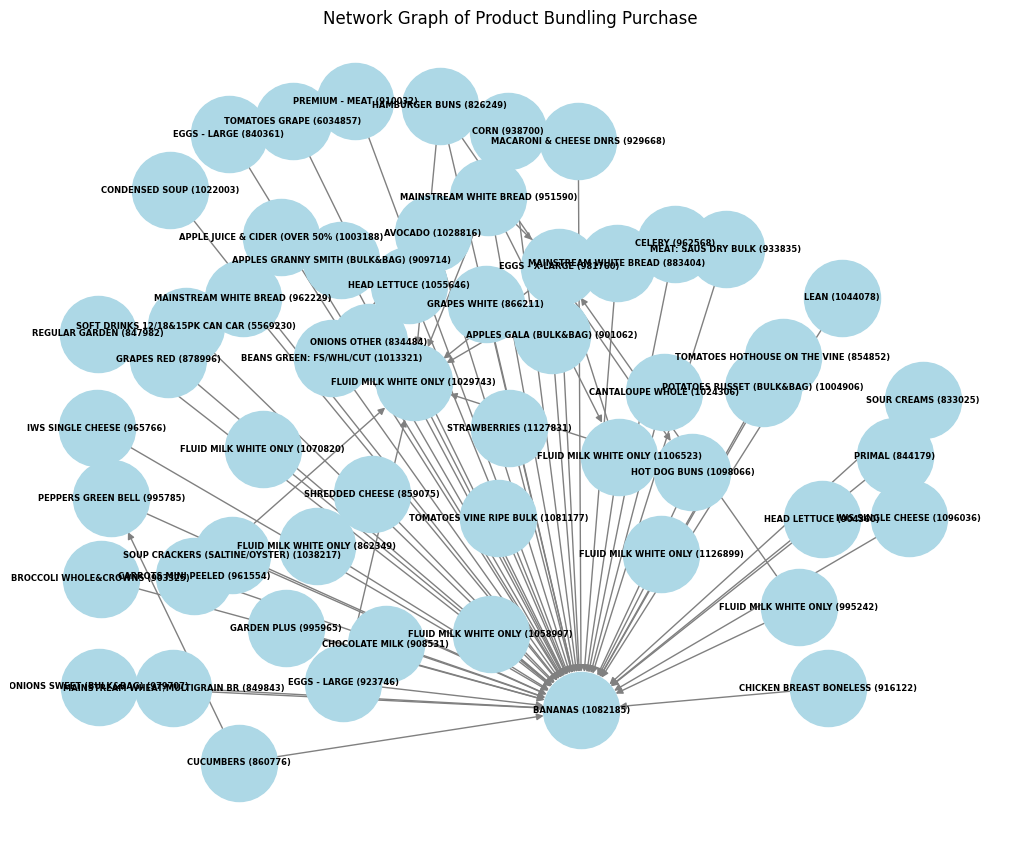

In [69]:
# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
for _, row in rules_modified_.iterrows():
    G.add_edge(row['PRODUCT_DESC_ID_antecedents'], row['PRODUCT_DESC_ID_consequents'],
               weight=row['confidence'])  # You can add more attributes if needed

# Draw the network
pos = nx.spring_layout(G)  # Define the layout
plt.figure(figsize=(10, 8))  # Define figure size
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue',
        edge_color='gray', font_size=6, font_weight='bold', arrows=True)

# Display the plot
plt.title('Network Graph of Product Bundling Purchase')
plt.show()

In [70]:
# Create a directed graph
G = nx.DiGraph()

# Add edges with attributes
for _, row in rules_modified_.iterrows():
    G.add_edge(row['PRODUCT_DESC_ID_antecedents'], row['PRODUCT_DESC_ID_consequents'],
               support=row['support'], confidence=row['confidence'], lift=row['lift'])

# Extract node positions using a layout algorithm
pos = nx.spring_layout(G)

# Create Plotly traces for nodes and edges
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_y.append(y0)
    edge_y.append(y1)

# Create edge trace
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    mode='lines',
    line=dict(width=0.5, color='#888')
)

# Create node trace
node_x = [pos[node][0] for node in G.nodes()]
node_y = [pos[node][1] for node in G.nodes()]

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    text=[str(node) for node in G.nodes()],
    textposition='top center',
    textfont=dict(size=10),
    marker=dict(size=10, color='#1f77b4')
)

# Create Plotly figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    showlegend=False,
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False)
                ))

fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
# Create a directed graph using igraph
g = ig.Graph(directed=True)

# Add nodes
nodes = set(rules_modified_['PRODUCT_DESC_ID_antecedents']).union(set(rules_modified_['PRODUCT_DESC_ID_consequents']))
g.add_vertices(list(nodes))

# Map vertex names to indices
vertex_name_map = {name: i for i, name in enumerate(g.vs['name'])}

# Add edges with correct vertex indices
edges = [(vertex_name_map[row['PRODUCT_DESC_ID_antecedents']], vertex_name_map[row['PRODUCT_DESC_ID_consequents']]) for _, row in rules_modified_.iterrows()]
g.add_edges(edges)
g.es['support'] = rules_modified_['support'].tolist()
g.es['confidence'] = rules_modified_['confidence'].tolist()
g.es['lift'] = rules_modified_['lift'].tolist()

# Extract node positions using a layout algorithm
layout = g.layout("fr")  # Fruchterman-Reingold layout
pos = {i: (layout[i][0], layout[i][1]) for i in range(len(layout))}

# Create Plotly traces for nodes and edges
edge_x = []
edge_y = []
for edge in g.es:
    x0, y0 = pos[edge.source]
    x1, y1 = pos[edge.target]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_y.append(y0)
    edge_y.append(y1)

# Create edge trace
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    mode='lines',
    line=dict(width=0.5, color='#888')
)

# Create node trace
node_x = [pos[i][0] for i in range(len(pos))]
node_y = [pos[i][1] for i in range(len(pos))]

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    text=[str(i) for i in range(len(pos))],
    textposition='top center',
    marker=dict(size=10, color='#1f77b4')
)

# Create Plotly figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    showlegend=False,
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False)
                ))

fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

